
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
import scipy.stats as stats

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df.shape

(6095, 48)

In [4]:
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

In [5]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [6]:
#df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_COL = "salary_monthly_NETO"

# function that copy a new dataframe and delete NaN Values
def clean_dataframe(df, salary_COL):
  df = df.copy()
  # Delete repeated rows
  df.drop_duplicates(keep='first', inplace=True)
  df = df.reset_index(drop=True)
  # Delete NULL values
  df = df[df[salary_COL].notna()]  
  df = df[(df[salary_COL] > 54207) & (df[salary_COL] < 542070)]
  # Reset the index
  df = df.reset_index(drop=True)
  return df

In [7]:
#df[df.salary_monthly_NETO > 1000]\
  #[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()
df_new = clean_dataframe(df, salary_COL)
df_new.shape

(4159, 48)

In [8]:
#alpha = 0.05"
is_man = df_new.profile_gender == "Hombre"

groupA = df_new[is_man].salary_monthly_NETO     #Se seleccionan las filas que correspondan a 
groupB = df_new[~is_man].salary_monthly_NETO;    #género hombre junto a la columna de salary_monthly_NETO

print("Dimension del grupoA:", groupA.shape)
print("Dimension del grupoB:", groupB.shape)

Dimension del grupoA: (3582,)
Dimension del grupoB: (577,)


In [9]:
groupA.describe().apply(lambda s: '{0:.11f}'.format(s))


count      3582.00000000000
mean     112588.90428810721
std       69274.74113057692
min       54400.00000000000
25%       74000.00000000000
50%       92981.00000000000
75%      120000.00000000000
max      535000.00000000000
Name: salary_monthly_NETO, dtype: object

In [10]:
groupB.describe().apply(lambda s: '{0:.11f}'.format(s))

count       577.00000000000
mean      95978.64393414211
std       45802.43348134521
min       54310.00000000000
25%       68000.00000000000
50%       84000.00000000000
75%      107500.00000000000
max      442127.00000000000
Name: salary_monthly_NETO, dtype: object

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

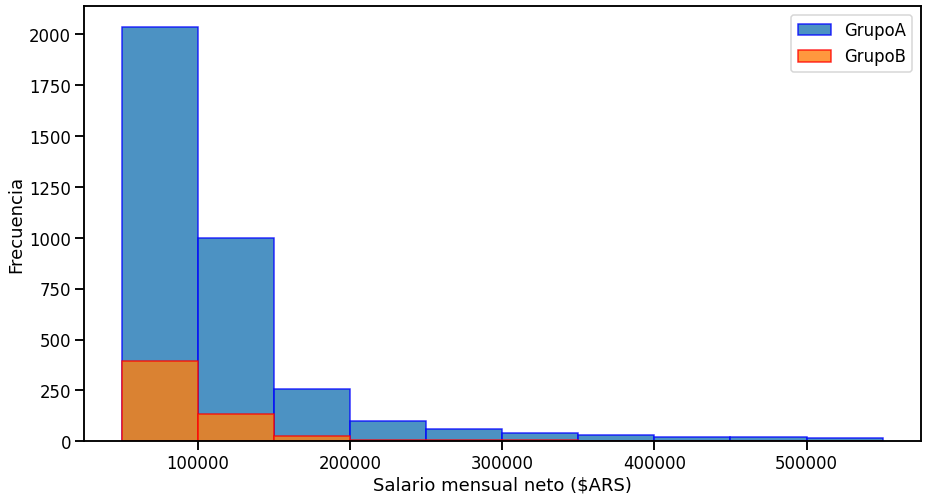

In [11]:
#Obtenemos histogramas de ambas muestras
list_bins = [50000*value for value in range(1, 12)]

plt.figure(figsize=(15,8))
plt.hist(groupA, label='GrupoA', alpha=0.8, edgecolor='blue', bins=list_bins) 
plt.hist(groupB, label='GrupoB', alpha=0.8, edgecolor='red', bins=list_bins)
plt.xlabel("Salario mensual neto ($ARS)")
plt.ylabel("Frecuencia")
plt.legend();

In [12]:
#Cálculo del tamaño de cada muestra
ngroupA = groupA.count()
ngroupB = groupB.count()
print("Tamaño de la muestra nA:", ngroupA)
print("Tamaño de la muestra nB:", ngroupB)

# Calculo de estadístico de resta de medias muestrales
subtractionMean = groupA.mean() - groupB.mean()
print("Estadístico de resta de medias muestrales:", subtractionMean)

Tamaño de la muestra nA: 3582
Tamaño de la muestra nB: 577
Estadístico de resta de medias muestrales: 16610.260353965103


In [13]:
#Calculo de varianzas
sA2 = groupA.var()
sB2 = groupB.var()
print("Varianza del groupA:", sA2)
print("Varianza del groupB:", sB2)

Varianza del groupA: 4798989758.708446
Varianza del groupB: 2097862912.8130527


In [14]:
def process_df(df):
  df = df.copy()
  df["masculino"] = df.apply(lambda x: 1 if str(x["profile_gender"]).upper() == "HOMBRE" else 0, axis=1)
  return df

df_process = process_df(df_new)
df_process["masculino"].value_counts()


1    3582
0     577
Name: masculino, dtype: int64

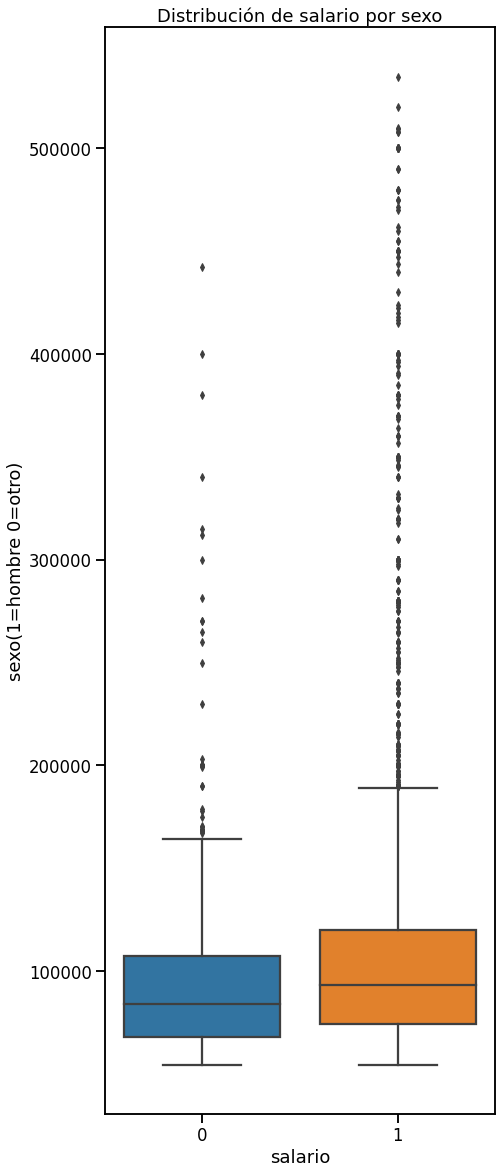

In [15]:
# Grafico boxplot
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 20))
sns.boxplot(
    x       = "masculino",
    y       = "salary_monthly_NETO",
    data    = df_process,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de salario por sexo')
ax.set_xlabel('salario')
ax.set_ylabel('sexo(1=hombre 0=otro)');

In [16]:
#Dado que las varianzas de cada muestra dieron distinto,
#no se cumple la homocedasticidad y por ello utilizamos
#Test de Welch Two Sample t-test

#Cáclulo de los grados de libertad correspondientes al Test de Welch 
gl =  (((sA2)/ngroupA  + (sB2)/ngroupB)**2) / (((sA2/ngroupA)**2 /(ngroupA-1)) + ((sB2/ngroupB)**2 /(ngroupB-1)))
print("Grados de libertad:", gl)

Grados de libertad: 1055.6528187315407


Cálculo de t utilizando función T- Student, considerando grados de libertad gl y percentil 1-alpha/2

In [17]:
alpha = 0.05
t_0975 = stats.t.ppf(q=0.975, df =gl)
print("t_0975:", t_0975)

t_0975: 1.962213727242077


Cálculo de Límites inferior y superior del intervalo de confianza para la resta de medias

In [18]:
l_inf = subtractionMean - t_0975 * ((sA2/ngroupA) + (sB2/ngroupB))**0.5
l_sup = subtractionMean + t_0975 * ((sA2/ngroupA) + (sB2/ngroupB))**0.5

print("Límite inferior del intervalo de confianza para la comparación de medias muestrales:", l_inf)
print("Límite superior del intervalo de confianza para la comparación de medias muestrales:", l_sup)
l_inf, l_sup

Límite inferior del intervalo de confianza para la comparación de medias muestrales: 12233.35255025847
Límite superior del intervalo de confianza para la comparación de medias muestrales: 20987.168157671735


(12233.35255025847, 20987.168157671735)

Conclusión: encontramos que la diferencia de medias de salario entre los grupos Hombre versus Otros géneros, resultó ser de 16610,3 ARS según la estimación puntual del estadístico. Para el cálculo del intervalo de confianza con un nivel del 95%, obtuvimos un límite inferior de 12233,3 ARS y un límite máximo de 20987,2 ARS.

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0: \mu_A = \mu_B$    vs    $H_1: \mu_A > \mu_B$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


El test de Levene, el test de Bartlett y el test de Fligner-Killeen son tres de los test de hipótesis más empleados comparar la varianza entre grupos. En todos ellos, se considera como hipótesis nula que los datos proceden de distribuciones con la misma varianza (homocedasticidad). Por lo tanto, si el p-value es menor que un determinado valor (en este caso, 0.05), entonces se considera que hay evidencias suficientes para rechazar la homocedasticidad en favor de la heterocedasticidad.

El test de Levene y el test de Fligner-Killeen (este último no paramétrico) son más robustos que el test de Bartlett ante la falta de normalidad, por lo que suele aconsejarse su uso. Además, tanto el test de Levene como el de Bartlett permiten elegir entre diferentes estadísticos de centralidad: mediana (por defecto), media, media truncada. Esto es importante a la hora de contrastar la homocedasticidad dependiendo de si los grupos se distribuyen de forma normal o no.

Si se tiene seguridad de que las muestras a comparar proceden de poblaciones que siguen una distribución normal, es recomendable el test de Bartlett. Si no se tiene la seguridad de que las poblaciones de origen son normales, se recomiendan el test de Leven utilizando la mediana o el test no paramétrico Fligner-Killeen que también se basa en la mediana.

Decidir en base a la evidencia de la muestra si rechazar o no la hipótesis nula. Para decidir si rechazar o no la hipótesis nula se calcula el p-valor y se lo contrasta con el nivel de significancia preestablecido. Si el resultado es mayor a 0,05; concluiremos que no existe evidencia suficiente para rechazar la hipótesis nula. Si el valor es menor a 0,05; concluiremos que xiste evidencia suficiente para rechazar la hipótesis nula.

In [27]:
# Levene test
# ==============================================================================
levene_test = stats.levene(groupA, groupB, center='median')
levene_test

LeveneResult(statistic=19.60562617218214, pvalue=9.763276955017239e-06)

In [20]:
# Bartlett test
# ==============================================================================
bartlett_test = stats.bartlett(groupA, groupB)
bartlett_test

BartlettResult(statistic=139.00579427264412, pvalue=4.391662009929093e-32)

In [21]:
# Levene test
# ==============================================================================
fligner_test = stats.fligner(groupA, groupB, center='median')
fligner_test

FlignerResult(statistic=26.029588715484287, pvalue=3.362247030409009e-07)

In [22]:
# Cálculo del estadístico de prueba t 
t = subtractionMean / (((sA2/ngroupA) + (sB2/ngroupB))**0.5)
print("Estadístico de prueba t:", t)

Estadístico de prueba t: 7.446554129381828


In [23]:
#Cálculo del p-valor
p_valor = stats.t.sf(abs(t), df=gl)
print("p_valor", p_valor)

p_valor 9.931081161872911e-14


Dado que p_valor < 𝜶 ⇒ se rechaza la hipótesis nula

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

NameError: ignored

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.
